In [1]:
#level_curves.ipynb
#by Joe Hahn, jmh.datasciences@gmail.com, 17 March 2018.
#plot phase-space diagrams for ringlets librating about their fixed point

In [2]:
#prep plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
sns.set(font_scale=1.5, font='DejaVu Sans')
import numpy as np

In [3]:
#restore output
parent_folders = ['I_0.0003/', 'I_0.0160/', 'I_0.0310/', 'I_0.0616/' , 'I_0.0722/']
I = ['0.0003', '0.0160', '0.0310', '0.0616', '0.0722']
da_list = []
de_list = []
dwt_list = []
a_avg_list = []
e_avg_list = []
from helper_fns import *
from libration import *
for parent_folder in parent_folders:
    #read simulation output
    input_file = parent_folder + "inputs.py"
    execfile(input_file)
    the_output_folder = parent_folder + output_folder
    print 'reading output in folder = ', the_output_folder
    r, t, vr, vt, times, lambda0 = restore_output(the_output_folder)
    a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)
    print 'r.shape = ', r.shape
    #get da, de, dwt differences at inner & outer streamline's periapse
    da, de, dwt, a_avg, e_avg = calculate_deltas(r, a, e, wt)
    da_list += [da]
    de_list += [de]
    dwt_list += [dwt]
    a_avg_list += [a_avg]
    e_avg_list += [e_avg]
    #BGT fixed point
    M_central = 1.0
    Ra = (Rp/a_avg).mean()
    da_over_a = (da/a_avg).mean()
    H, q2 = H_q2(a_avg, e_avg, da, de, dwt)
    H_avg = 0.5*(H.min() + H.max())
    de_eq_bgt = (21.0/4)*np.pi*e_avg.mean()*J2*(M_central/total_ring_mass)*(Ra**2)*(da_over_a**3)/H_avg
    print 'BGT equilibrium de = ', de_eq_bgt

reading output in folder =  I_0.0003/output
r.shape =  (1001, 2, 101)
BGT equilibrium de =  0.000636352749728
reading output in folder =  I_0.0160/output
r.shape =  (1001, 2, 101)
BGT equilibrium de =  0.000636630852165
reading output in folder =  I_0.0310/output
r.shape =  (1001, 2, 101)
BGT equilibrium de =  0.000636172496041
reading output in folder =  I_0.0616/output
r.shape =  (1001, 2, 101)
BGT equilibrium de =  0.000634247436327
reading output in folder =  I_0.0722/output
r.shape =  (1001, 2, 101)
BGT equilibrium de =  0.000631246439183


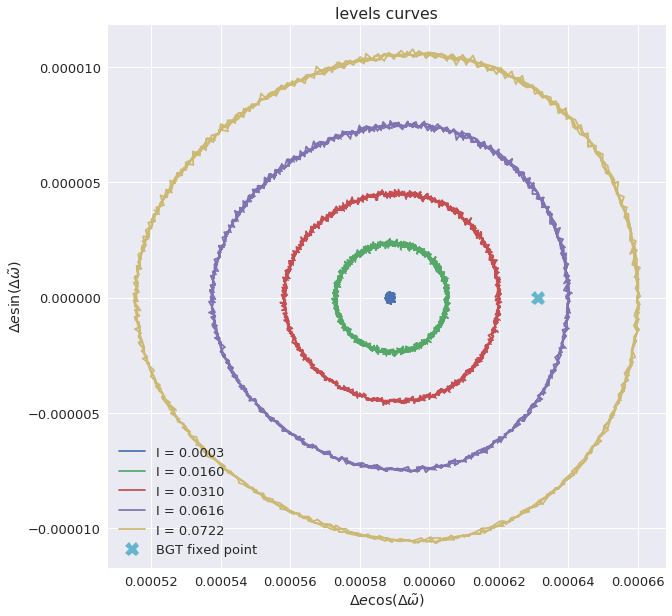

In [4]:
#plot level curves
sns.set(font_scale=1.3, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 10))
p = ax.set_title('levels curves')
p = ax.set_xlabel(r'$\Delta e\cos(\Delta\tilde{\omega})$')
p = ax.set_ylabel(r'$\Delta e\sin(\Delta\tilde{\omega}$)')
for idx in range(len(de_list)):
    de = de_list[idx]
    dwt = dwt_list[idx]
    x = de*np.cos(dwt)
    y = de*np.sin(dwt)
    lbl = 'I = ' + I[idx]
    p = ax.plot(x, y, marker='o', markersize=1, linestyle='-', label=lbl)
    #p = ax.plot(de_eq, 0, marker='X', markersize=14, linestyle='none', label='simulation')
p = ax.plot(de_eq_bgt, 0, marker='X', markersize=14, linestyle='none', label='BGT fixed point')
p = plt.legend()